In [1]:
import sys
sys.path.insert(0, "../..")

import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')

from module.base.network import Network

from module.simulation.meanfield import MeanField
from module.simulation.quick_meanfield2 import QuickMeanField2
from module.simulation.meanfield2 import MeanField2
from module.simulation.set_meanfield2 import SetMeanField2

import module.components.CONST as CONST
from module.components.lawrence_dist import LawrenceDist
from module.components.discrete_gaussian1D import DiscreteGaussian1D
from module.components.restricted_gaussian1D import RestrictedGaussian1D

from module.components.Adam import Adam

/tmp/ipykernel_534/4276959700.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
def set_size(width = "thesis", fraction=1, subplots=(1, 1)):
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**0.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

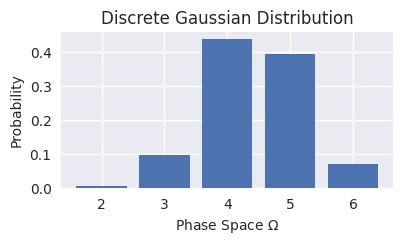

In [3]:
mean = 4.43
var = 0.6

g = DiscreteGaussian1D(phase_space_min=2, phase_space_max=7)
probs = g.calc_prob(mean, var)
plt.figure(figsize=set_size(fraction = 0.7))
plt.bar(g.phase_space, probs, color = "C0")
plt.xlabel("Phase Space $\Omega$")
plt.ylabel("Probability")
plt.title("Discrete Gaussian Distribution")
plt.tight_layout()
plt.savefig("../../output/misc/discrete_gaussian_dist.pdf")

## $p^2$-4dist

In [24]:
phase_space = np.arange(2,7)

In [31]:
g = DiscreteGaussian1D(phase_space_min=2, phase_space_max=7)
g2 = RestrictedGaussian1D(phase_space_min=2, phase_space_max=7)

In [32]:
mean = 4.43
var = 0.6
d = mean - np.floor(mean)

var = np.clip(var, d * (1 - d), (2 - d) * (1 + d) - 0.2)
alpha = -(d + 1) ** 2 + 5 * (d + 1) - 6 - var
beta = 2 - d
p0_opt = 1/40 * (2 - 10 * alpha - 8 * beta)
a = 0.5 * (var - d * (1 - d))

p0 = np.clip(p0_opt, 0, a * (2-d)/3)
p1 = -0.5 * (alpha + 6 * p0)
p2 = alpha + beta + 3*p0
p3 = 1 - p0 - p1 - p2

probs = np.zeros(phase_space.shape)
probs[1] = p0
probs[2] = p1
probs[3] = p2
probs[4] = p3

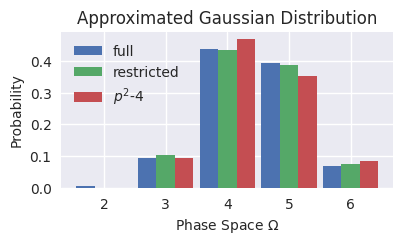

In [37]:
plt.figure(figsize = set_size(fraction = 0.7))

plt.bar(phase_space-0.3, g.calc_prob(mean, var), width =  0.3, label = "full")
plt.bar(phase_space, g2.calc_prob(mean, var), width = 0.3, label = "restricted")
plt.bar(phase_space+0.3, probs, width = 0.3, label = "$p^2$-4")


plt.xlabel("Phase Space $\Omega$")
plt.ylabel("Probability")
plt.title("Approximated Gaussian Distribution")
plt.legend()
plt.tight_layout()
plt.savefig("../../output/misc/approximated_gaussian_dist.pdf")